# 데이터 정제

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, minmax_scale, robust_scale

%matplotlib inline

In [58]:
matplotlib.rc("font", family="Noto Sans CJK JP")
plt.rcParams['axes.unicode_minus'] = False

## 데이터 정제_연습
- 운동에 따른 혈당산소요구량 데이터. 결측치 및 이상치를 확인하고 적절한 방법으로 처리
-> 결측 처리 변수 : GENDER, WEIGHT / 이상치 처리 변수 : RSTPULSE
- 데이터 : FITNESS_결측.csv(변수: 10개, 자료 수: 31개)

In [59]:
df_raw = pd.read_csv("/home/piai/test/Practice/data/FITNESS_결측.csv", engine="python",encoding="EUC-KR")
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [60]:
# 결측치 확인
df_raw.isnull().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [61]:
# 결측치 현황 요약 : sum 함수
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [62]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      31 non-null     object 
 1   GENDER    30 non-null     object 
 2   AGE       31 non-null     int64  
 3   AGEGROUP  31 non-null     object 
 4   WEIGHT    29 non-null     float64
 5   OXY       31 non-null     float64
 6   RUNTIME   31 non-null     float64
 7   RUNPULSE  31 non-null     int64  
 8   RSTPULSE  31 non-null     int64  
 9   MAXPULSE  31 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


In [63]:
df_raw["GENDER"].fillna("여성", inplace = True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [64]:
df_count = df_raw["GENDER"].value_counts()
df_count

여성    16
남성    15
Name: GENDER, dtype: int64

In [65]:
df_raw.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [66]:
df_raw["WEIGHT"].fillna(82.433, inplace=True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [67]:
# 이런 식으로 WEIGHT의 결측치를 평균으로 채울수도 있음(위 코드와 동일)
df_raw["WEIGHT"] = \
df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [68]:
# 잘 대체되었는지 결과 확인
df_raw.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      0
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

## boxplot을 활용하여 이상치 확인

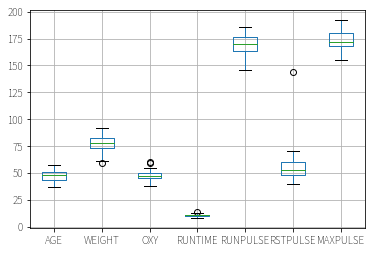

In [69]:
df_raw.boxplot()

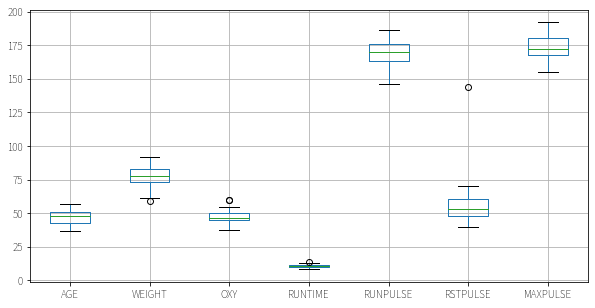

In [70]:
# boxplot 그리기 = figsize: 그래프 크기(x축, y축)
df_raw.boxplot(figsize = (10,5))

In [71]:
# 조건 해당 자료 직접 확인
df_raw[df_raw["RSTPULSE"] >= 100]

# 복수 조건 : and, or

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [72]:
# RSTPULSE 변수에서 이상치 제외
df_fitness = df_raw[df_raw['RSTPULSE'] < 100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [73]:
# 자료 reset_index (drop = True : 인덱스 열을 버림)
df_fitness.reset_index(drop = True, inplace = True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


## Scale 변환 :scale 변환 대상 변수 = 숫자형 변수 (문자형 변수는 적용 안 됨)

In [74]:
df_fitness_num = df_fitness.select_dtypes(exclude = "object")
df_fitness_num.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


## scale 변환(standard, 평균=0, 표준편차=1)

In [75]:
df_scale_std = scale(df_fitness_num)

In [76]:
df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_num.columns)
df_scale_std.head().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.806,-1.119,2.335,-1.772,-0.361,-1.857,-0.200
1,-1.507,0.607,2.429,-1.423,0.029,-0.778,1.329
2,-0.631,1.106,1.302,-1.408,-1.337,-1.182,-0.637
3,0.596,-0.777,1.366,-1.204,-2.313,-0.778,-2.056
4,0.421,0.678,0.295,-1.181,1.005,-1.317,1.219


In [77]:
df_scale_std.describe()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,-2.442491e-16,1.014004e-15,8.881784e-16,1.879978e-15,1.154632e-15,1.739349e-16,-1.036208e-15
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.682055e+00,-2.260674e+00,-2.009160e+00,-1.771826e+00,-2.312773e+00,-1.856653e+00,-2.056450e+00
25%,-6.307705e-01,-4.947256e-01,-4.859243e-01,-6.093728e-01,-7.026146e-01,-7.777264e-01,-6.369535e-01
50%,1.576926e-01,-2.036681e-02,-1.223353e-01,-8.305039e-02,2.927561e-02,-1.708301e-01,-2.001854e-01
75%,7.709418e-01,6.777082e-01,5.113385e-01,4.906031e-01,6.147878e-01,6.720815e-01,6.733508e-01
max,1.822226e+00,1.834917e+00,2.429494e+00,2.665943e+00,1.590641e+00,2.189322e+00,1.983655e+00


In [78]:
# scale변환 : 최소,최대값 기준 (최소=0, 최대=1)
df_scale_minmax = minmax_scale(df_fitness_num)

df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_num.columns)
df_scale_minmax.head().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.279,0.979,0.000,0.50,0.000,0.459
1,0.05,0.700,1.000,0.078,0.60,0.267,0.838
2,0.30,0.822,0.746,0.082,0.25,0.167,0.351
3,0.65,0.362,0.760,0.128,0.00,0.267,0.000
4,0.60,0.717,0.519,0.133,0.85,0.133,0.811


In [79]:
df_scale_minmax.describe().round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [80]:
# scale변환 : 로버스트 기준
df_scale_robust = robust_scale(df_fitness_num)

# DataFrame으로 변환
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [81]:
df_scale_robust.describe().round(3) # robust는 중간값이 0

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


In [82]:
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"] = df_fitness_num["RSTPULSE"]
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [83]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fa17a1e80>,
      dtype=object)

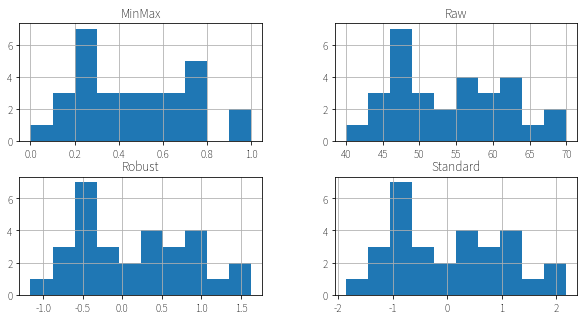

In [84]:
df_rstpulse[["Raw","Standard","MinMax","Robust"]].hist(figsize=(10,5))

In [85]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
matplotlib.rc('font', family='Noto Sans CJK JP')

## 연습
- 운동에 따른 혈당 산소 요구량 데이터에 대해 그래프 분석
- (데이터:FITNESS.CSV)

In [93]:
df_fitness = pd.read_csv("/home/piai/test/Practice/data/FITNESS.csv", engine="python",encoding="EUC-KR")
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [94]:
df_fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NAME      31 non-null     object 
 1   GENDER    31 non-null     object 
 2   AGE       31 non-null     int64  
 3   AGEGROUP  31 non-null     object 
 4   WEIGHT    31 non-null     float64
 5   OXY       31 non-null     float64
 6   RUNTIME   31 non-null     float64
 7   RUNPULSE  31 non-null     int64  
 8   RSTPULSE  31 non-null     int64  
 9   MAXPULSE  31 non-null     int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ KB


In [95]:
df_fitness.isnull().sum() # 결측치가 없는 것을 확인할 수 있다.

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      0
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

## 1. Bar Chart 그리기

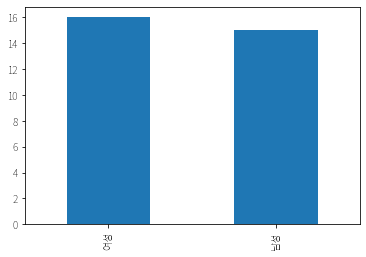

In [96]:
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

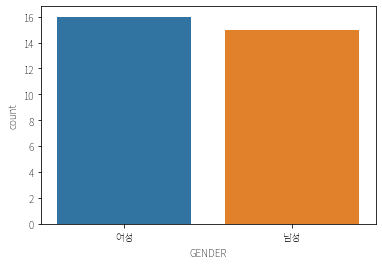

In [97]:
sns.countplot(x="GENDER", data=df_fitness)

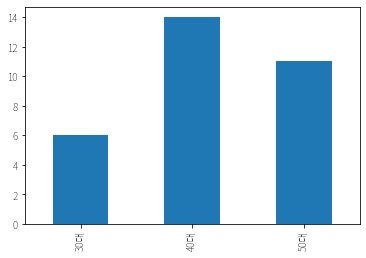

In [98]:
df_count = df_fitness["AGEGROUP"].value_counts()

df_count.sort_index(inplace = True)
df_count.plot.bar()

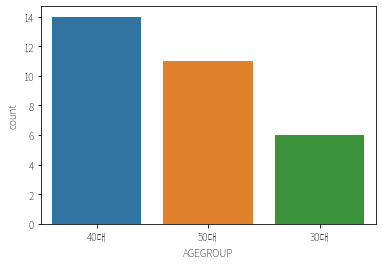

In [99]:
sns.countplot(x="AGEGROUP", data=df_fitness, order = df_fitness["AGEGROUP"].value_counts().index)

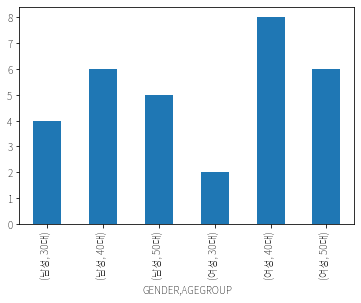

In [100]:
df_groupby_total = df_fitness.groupby(["GENDER","AGEGROUP"],as_index=False).size()

df_groupby_total.plot.bar()

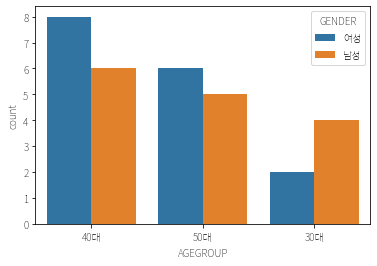

In [101]:
sns.countplot(x='AGEGROUP', hue="GENDER", data=df_fitness, order = df_fitness["AGEGROUP"].value_counts().index)

In [102]:
import matplotlib.font_manager as fm
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Serif Display',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'cmb10',
 'STIXSizeOneSym',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'cmtt10',
 'STIXNonUnicode',
 'cmss10',
 'cmex10',
 'cmsy10',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Serif',
 'cmmi10',
 'cmr10',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Sans',
 'STIXGeneral',
 'STIXGeneral',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym',
 'Manjari',
 'Manjari',
 'Waree',
 'Khmer OS System',
 'Loma',
 'Ubuntu',
 'Norasi',
 'Droid Sans Fallback',
 'Tlwg Typist',
 'Sawasdee',
 'mry_KacstQurn',
 'Laksaman',
 'Garuda',
 'Norasi',
 'Kinnari',
 'DejaVu Serif',
 'Kalimati',
 'Liberation Serif',
 'Phetsarath OT',
 'Liberation Serif',
 'FreeSerif',
 'KacstNaskh',
 'Tlwg Typewriter',


In [103]:
plt.rcParams['font.family'] = "Noto Sans CJK JP"

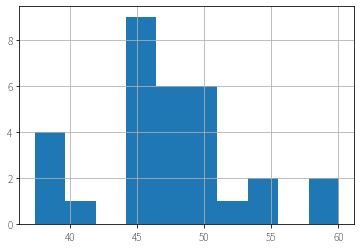

In [104]:
df_fitness["OXY"].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fa12eeca0>,
      dtype=object)

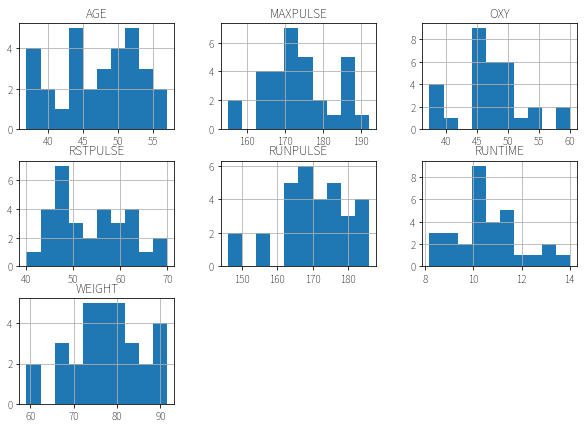

In [105]:
df_fitness.hist(figsize=(10,7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fa0fdf190>,
      dtype=object)

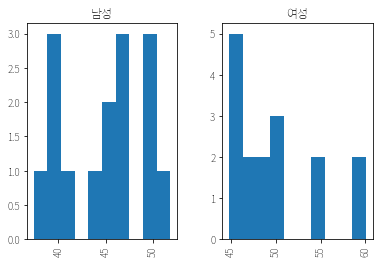

In [106]:
df_fitness.hist(column="OXY", by="GENDER")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fa0f0ffd0>,
      dtype=object)

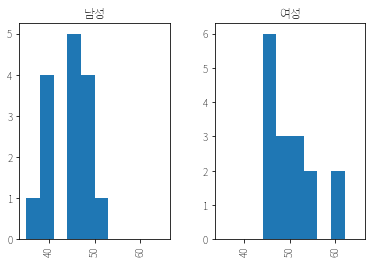

In [107]:
df_fitness.hist(column="OXY", by="GENDER", range=(35,65))

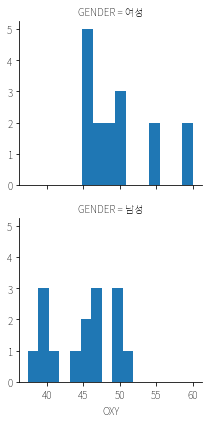

In [108]:
grid = sns.FacetGrid(df_fitness, "GENDER")

grid.map(plt.hist, "OXY")

Text(0.5, 1.0, '여성 vs. 남성, 혈당 산소요구량')

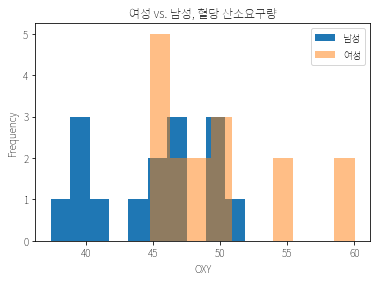

In [109]:
plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"], label="남성", alpha = 1)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"], label="여성", alpha = 0.5)
plt.legend()
plt.xlabel("OXY")
plt.ylabel("Frequency")
plt.title("여성 vs. 남성, 혈당 산소요구량")

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

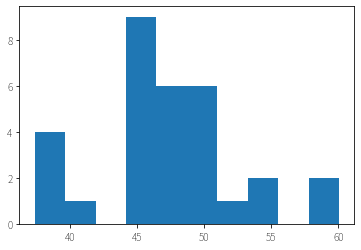

In [110]:
plt.hist(x="OXY", data = df_fitness)

(array([ 5.,  3., 12.,  7.,  2.,  2.]),
 array([37.388     , 41.16583333, 44.94366667, 48.7215    , 52.49933333,
        56.27716667, 60.055     ]),
 <a list of 6 Patch objects>)

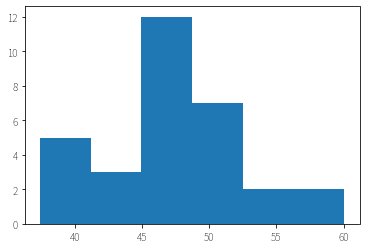

In [111]:
plt.hist(x="OXY", data=df_fitness, bins = 6)

## Box Plot 그리기

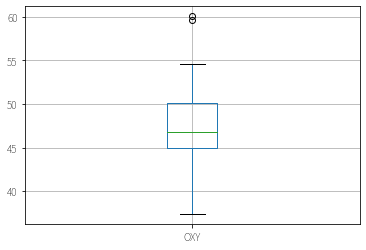

In [112]:
df_fitness.boxplot(column="OXY")

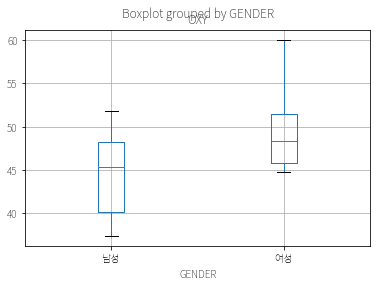

In [113]:
df_fitness.boxplot(column="OXY", by="GENDER")

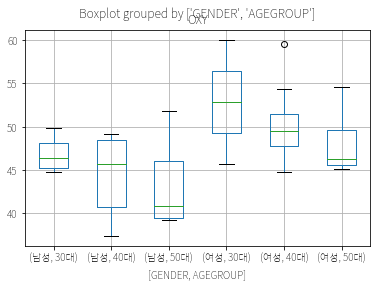

In [114]:
df_fitness.boxplot(column="OXY", by=["GENDER","AGEGROUP"])

In [115]:
df_count = df_fitness.groupby(["GENDER"]).size()

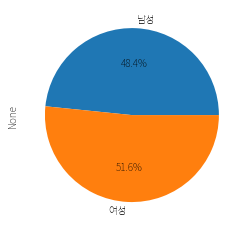

In [116]:
df_count.plot.pie(y = "OXY", autopct="%.1f%%")

In [117]:
df_count = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()

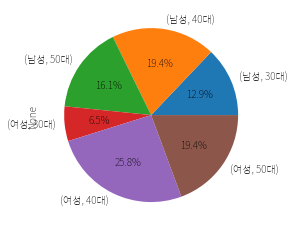

In [118]:
df_count.plot.pie(y = "OXY", autopct="%.1f%%")

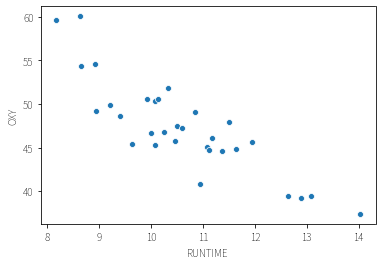

In [119]:
sns.scatterplot(x="RUNTIME", y="OXY", data=df_fitness)

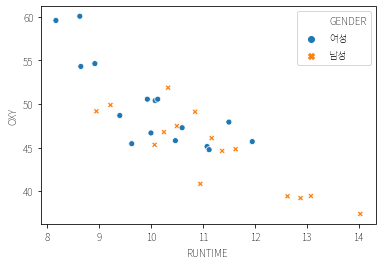

In [120]:
sns.scatterplot(x="RUNTIME", y="OXY",hue="GENDER", style="GENDER", data=df_fitness)

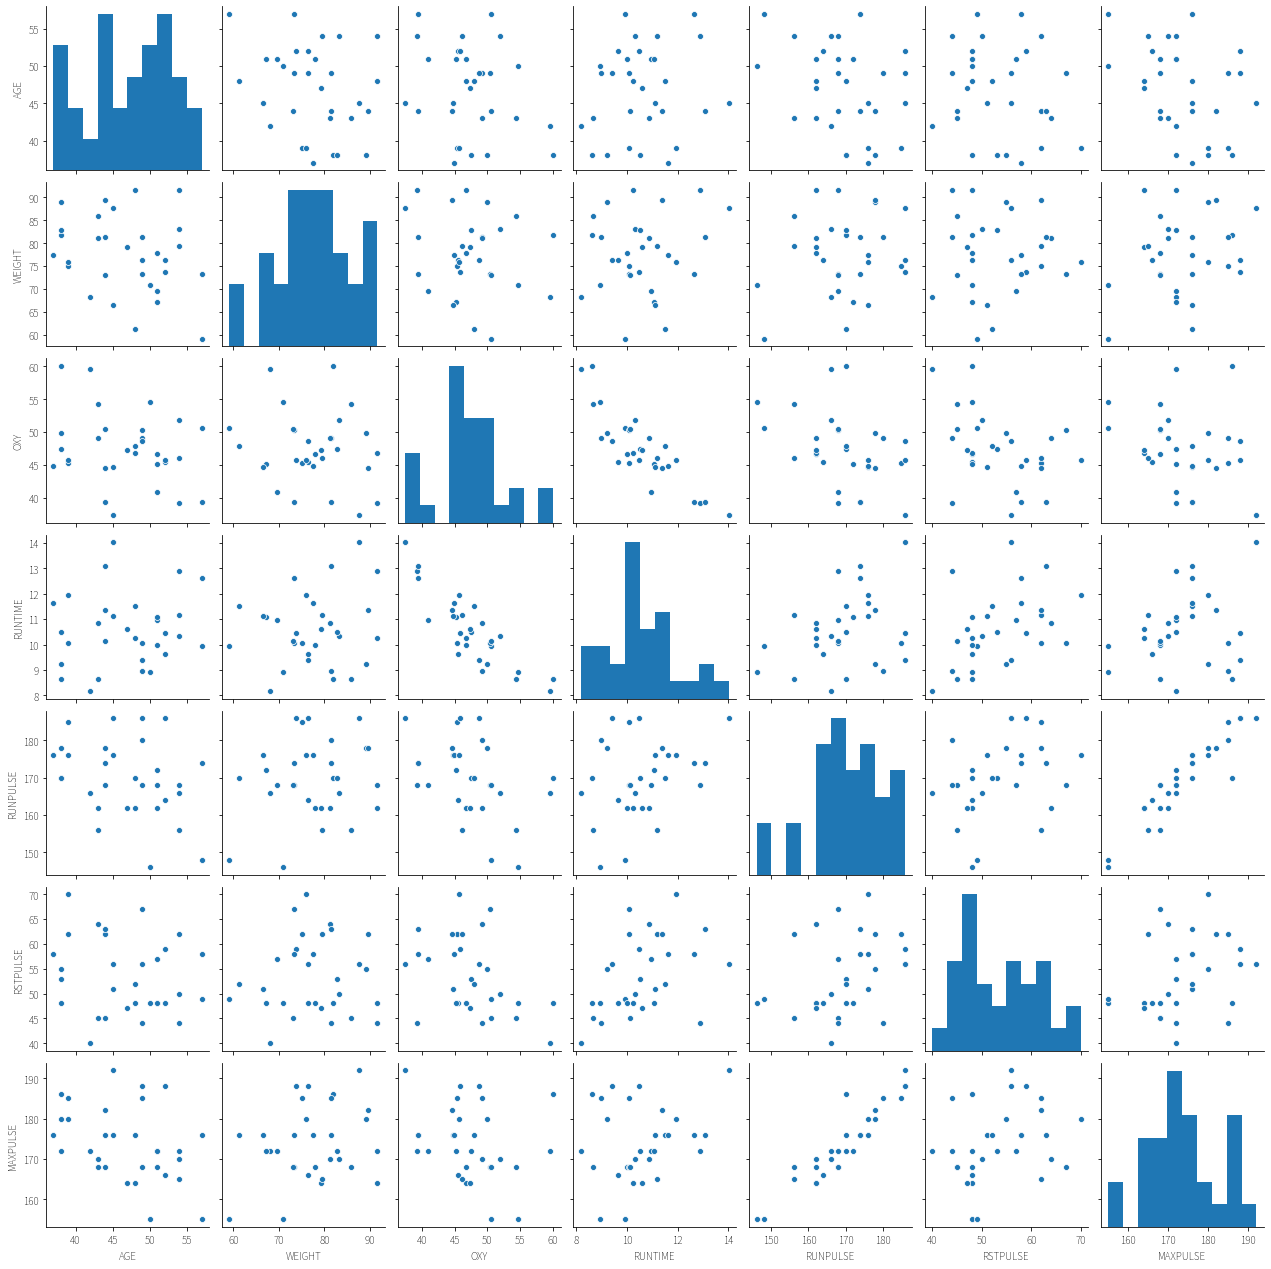

In [121]:
sns.pairplot(df_fitness)

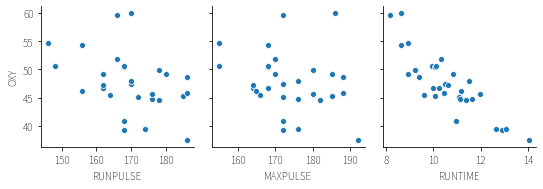

In [122]:
sns.pairplot(y_vars=["OXY"],x_vars=["RUNPULSE","MAXPULSE","RUNTIME"], data=df_fitness)

In [129]:
# 그래프 분석_Trend Chart (환율)
df_currency = pd.read_csv("/home/piai/test/Practice/data/환율.csv", engine="python",encoding="EUC-KR", parse_dates = ['APPL_DATE'])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


In [130]:
df_currency_pivot = df_currency.pivot(index='APPL_DATE', columns="CURRENCY", values="STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


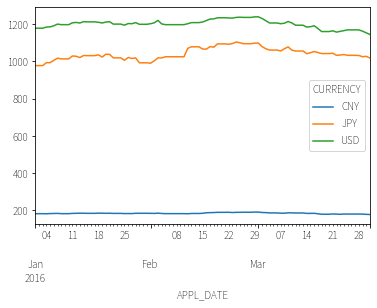

In [131]:
df_currency_pivot.plot()

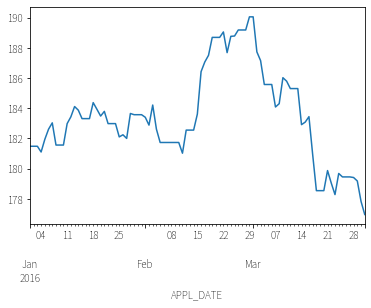

In [132]:
df_currency_pivot["CNY"].plot()

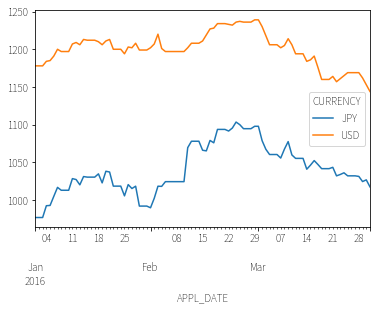

In [134]:
df_currency_pivot[["JPY", "USD"]].plot()

## heatmap 그리기

In [135]:
df_fitness.tail()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
26,Iris,여성,39,30대,75.98,45.681,11.95,176,70,180
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,44,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176
30,William,남성,45,40대,87.66,37.388,14.03,186,56,192


In [137]:
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("mean")
df_agg

,GENDER,AGEGROUP,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,남성,30대,38.000000,81.080000,46.866250,10.355000,177.250000,57.000000,178.250000
1,남성,40대,45.500000,85.465000,44.410000,11.421667,173.666667,56.166667,178.166667
2,남성,50대,54.000000,79.426000,43.476200,11.592000,166.400000,54.200000,171.000000
3,여성,30대,38.500000,78.925000,52.868000,10.290000,173.000000,59.000000,183.000000
4,여성,40대,45.875000,72.943750,50.427125,9.956250,169.000000,50.375000,172.500000
5,여성,50대,52.166667,70.856667,48.031833,10.005000,163.000000,50.000000,167.333333


In [139]:
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")
df_pivot

AGEGROUP,30대,40대,50대
GENDER,,,
남성,46.86625,44.410000,43.476200
여성,52.86800,50.427125,48.031833


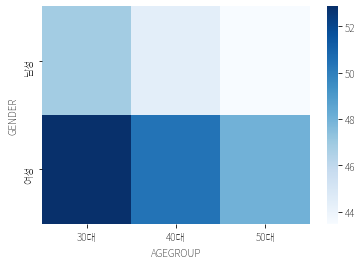

In [143]:
# heatmap
sns.heatmap(df_pivot, cmap="Blues") # cmap은 color map

## contour Plot 그리기

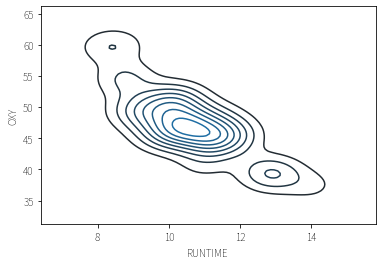

In [144]:
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = False)

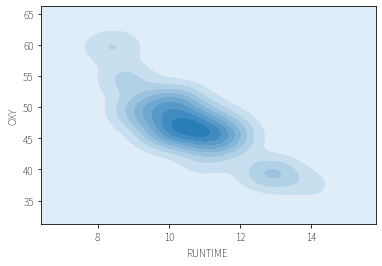

In [145]:
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = True)

## Parallel Plot 그리기

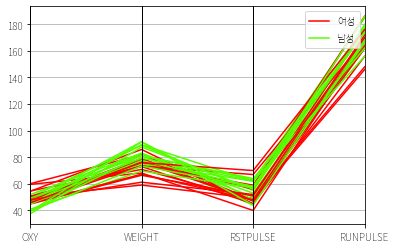

In [146]:
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols=["OXY","WEIGHT","RSTPULSE","RUNPULSE"], colormap="prism")

: 남성은 여성에 비해, 몸무게, 휴식/운동 시 맥박수는 높은 수준이지만 혈당 산소 요구량은 반대로 낮은 수준임

Text(488.9227272727271, 0.5, '혈당 산소 요구량')

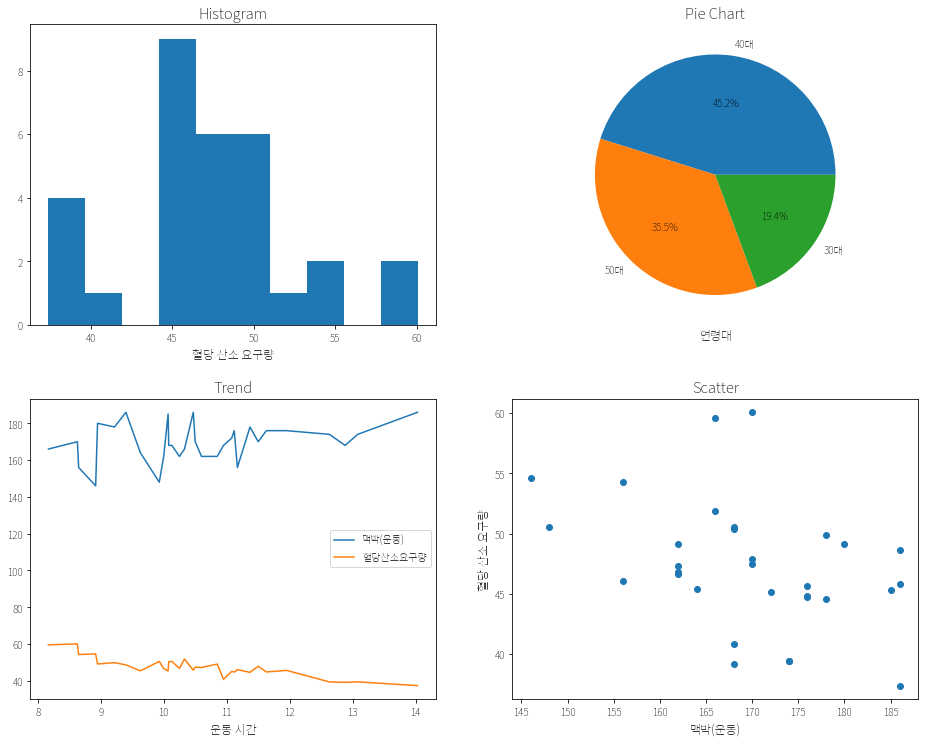

In [152]:
df_count = df_fitness["AGEGROUP"].value_counts()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (13,10))

plt.tight_layout(w_pad=5, h_pad=5)

axes[0,0].hist(df_fitness["OXY"])
axes[0,0].set_title("Histogram",fontsize = 15)
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize = 12)

axes[0,1].pie(df_count, labels=df_count.index.tolist(), autopct = "%.1f%%")
axes[0,1].set_title("Pie Chart", fontsize = 15)
axes[0,1].set_xlabel("연령대", fontsize = 12)

axes[1,0].plot("RUNTIME", "RUNPULSE", data=df_fitness, label="맥박(운동)")
axes[1,0].plot("RUNTIME", "OXY", data=df_fitness, label="혈당산소요구량")
axes[1,0].set_title("Trend", fontsize= 15)
axes[1,0].set_xlabel("운동 시간", fontsize=12)
axes[1,0].legend()

axes[1,1].scatter("RUNPULSE", "OXY", data=df_fitness)
axes[1,1].set_title("Scatter", fontsize = 15)
axes[1,1].set_xlabel("맥박(운동)", fontsize = 12)
axes[1,1].set_ylabel("혈당 산소 요구량",fontsize = 12)